#Trabalaho 4 Unidade 1

Aluna: Anelma Silva da Costa

Disciplina: Algoritmo e Estruturas de Dados 2

Professor: Ivanovitch

#Bibliotecas instaladas para resolução do trabalho

In [1]:
#Instalação da biblioteca osmnx que é responsável por dados geoespaciais de mapas, especificamente aqueles extraídos do OpenStreetMap (OSM).
#Osmnx permite a construção, análise e visualização de redes urbanas (como ruas, ciclovias, trilhas etc.)
!pip install osmnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 27.7 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
  Attempting uninstall: geopandas
    Found existing installation: geopandas 1.0.1
    Uninstalling geopandas-1.0.1:
      Successfully uninstalled geopandas-1.0.1


In [2]:
#Importação das bibliotecas
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

#Escolha da rede

- - O local escolhido para análise foi o bairro de Lagoa Nova, que é uma parte da rede de Natal - RN

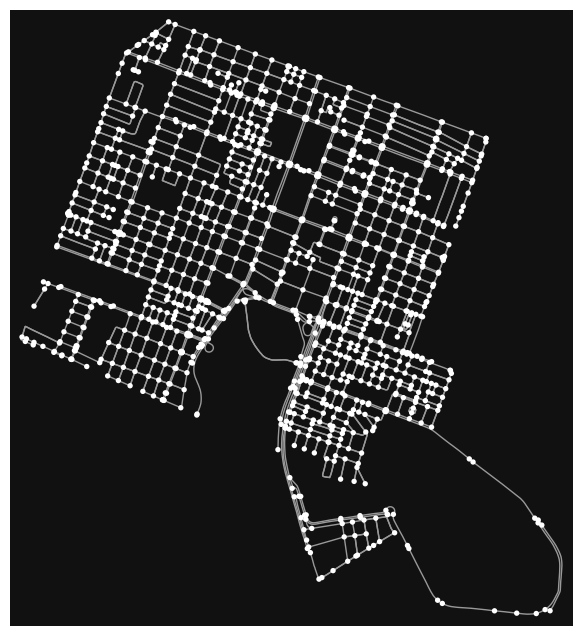

In [10]:
# Definir o local
place = 'Lagoa Nova, Natal, Rio Grande do Norte, Brazil'

# Obter a rede de ruas
G = ox.graph_from_place(place, network_type='drive')

# Plotar a rede
fig, ax = ox.plot_graph(G)

#Métricas

- Para realizar este trabalho escolhi três métricas e apliquei ao grafo do bairro de Lagoa Nova

- A métricas selecionadas foram: Average Shortest Path Length, Diameter of Network e Number Connected Components.

Average Shortest Path Length

 - Average Shortest Path Length (Comprimento Médio do Caminho Mais Curto): Tem como objetivo quantificar a distância média entre todos os pares de nós em um grafo. Em outras palavras, ela nos dá uma ideia de quão "próximos" os nós estão em média, considerando o caminho mais curto entre eles.

 - Caminho mais curto: É a sequência de arestas que conecta dois nós, minimizando a soma dos pesos dessas arestas (no caso de grafos ponderados).


In [4]:
# Converter o grafo para não direcionado
G_undirected = G.to_undirected()

# Comprimento médio do caminho mais curto
average_shortest_path_length = nx.average_shortest_path_length(G_undirected)
print("Comprimento médio do caminho mais curto:", average_shortest_path_length)

Comprimento médio do caminho mais curto: 19.865572389515805


Diameter of Network

- O Diameter of Network (Diâmetro da Rede): Indica a maior distância entre quaisquer dois nós conectados em um grafo. Em outras palavras, é o comprimento do caminho mais longo entre os nós mais distantes da rede.

In [5]:
# Diâmetro da rede
diameter = nx.diameter(G_undirected)
print("Diâmetro da rede:", diameter)

Diâmetro da rede: 49


Number Connected Components

- O Number Connected Components (Número de Componentes Conectados): Informa quantas sub-redes independentes existem em um grafo. Um componente conectado é um subgrafo no qual cada nó pode ser alcançado a partir de qualquer outro nó através de uma sequência de arestas.

In [6]:
# Componentes conectados
num_components = nx.number_connected_components(G_undirected)
print("Número de componentes conectados:", num_components)

Número de componentes conectados: 1


#Análise dos dados

######Agora vamos analisar o resultados obtidos pela méricas utilizadas acima


- ***Average Shortest Path Length: O resultado dessa métrica indica que os nós estão, em média, próximos uns dos outros, sugerindo um grafo bem conectado. O ASPL é geralmente menor que o diâmetro, fornecendo uma medida mais "global" da conectividade.***


- ***Diameter of Network: Na rede que analisamos, é visto que o diâmetro é baixo o que indica que a comunicação entre os nós é mais eficiente, pois as distâncias a serem percorridas são menores. Um diâmetro alto sugere que a rede é dispersa, com alguns nós muito distantes entre si. Em redes de comunicação ou transporte, o diâmetro representa o tempo máximo que uma mensagem ou um veículo levaria para ir de um ponto ao outro mais distante.***

- ***Number Connected Components: O valor obtido nesta métrica, indica que a rede é coesa e menos propensa a falhas de comunicação.***

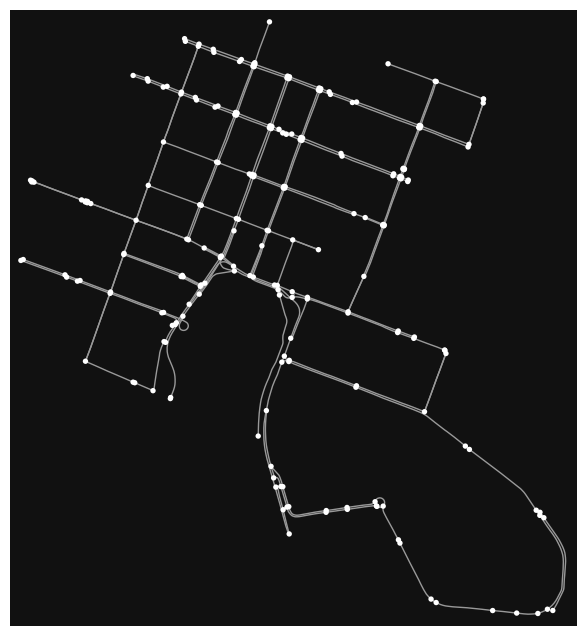

In [8]:
# Filtrar o grafo para incluir apenas ruas principais
G_principal = ox.graph_from_place(place, network_type='drive', custom_filter='["highway"~"primary|secondary"]')
# Plotar a rede
fig, ax = ox.plot_graph(G_principal)

# Visualizar a distribuição dos caminhos mais curtos
shortest_path_lengths = dict(nx.all_pairs_shortest_path_length(G))

# Extrair os comprimentos dos caminhos para uma lista
path_lengths = []
for source, targets in shortest_path_lengths.items():
    for target, length in targets.items():
        path_lengths.append(length)

- A imagem gerada pelo código mostra um mapa de ruas simplificado, com apenas as principais vias. Os nós representam as interseções e as arestas representam as ruas.

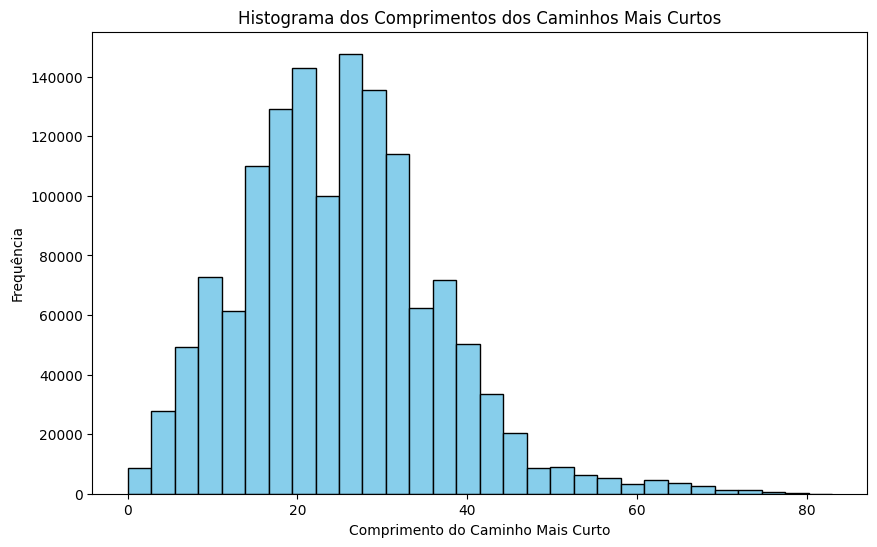

In [9]:
# Criar o histograma
plt.figure(figsize=(10, 6))
plt.hist(path_lengths, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Comprimento do Caminho Mais Curto')
plt.ylabel('Frequência')
plt.title('Histograma dos Comprimentos dos Caminhos Mais Curtos')
plt.show()


#Interpretação do Histograma

Levando em consideração a distribuição, nota-se um pico próximo a 25 unidades de comprimento, isso indica que a maioria dos pares de nós na rede estão a um distância relativamente curta um do outro. A dispersão dos dados é relativamente alta, como indicado pela amplitude do histograma. Isso indica que há uma grande variação nos comprimentos dos caminhos mais curtos entre os diferentes pares de nós.

Portanto a rede viária do bairro da Lagoa Nova apresenta uma boa conectividade, com a maioria dos pontos sendo relativamente próximos uns dos outros, apresenta uma certa heterogeneidade, com a presença de áreas mais densamente conectadas e outras mais esparsas.